In [3]:
import pandas as pd
import numpy as np
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [4]:
df_gender = pd.read_csv (r"/content/gender.csv")

In [5]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
df_gender['gender'] = df_gender['gender'].map({'Male': 0, 'Female': 1})

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
y = df_gender.gender.values #target
x = df_gender.drop(['gender'], axis = 1) #input

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [10]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)

acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 96.94%


In [11]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 96.34%


In [12]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 19, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 97.00%


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(x_train, y_train)

acc = knn.score(x_test,y_test)*100
accuracies['KNN'] = acc

print('Accuracy of K-NN classifier on test set: {:.2f}'.format(acc))

Accuracy of K-NN classifier on test set: 96.94


<ipython-input-14-e6d537a1e745>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


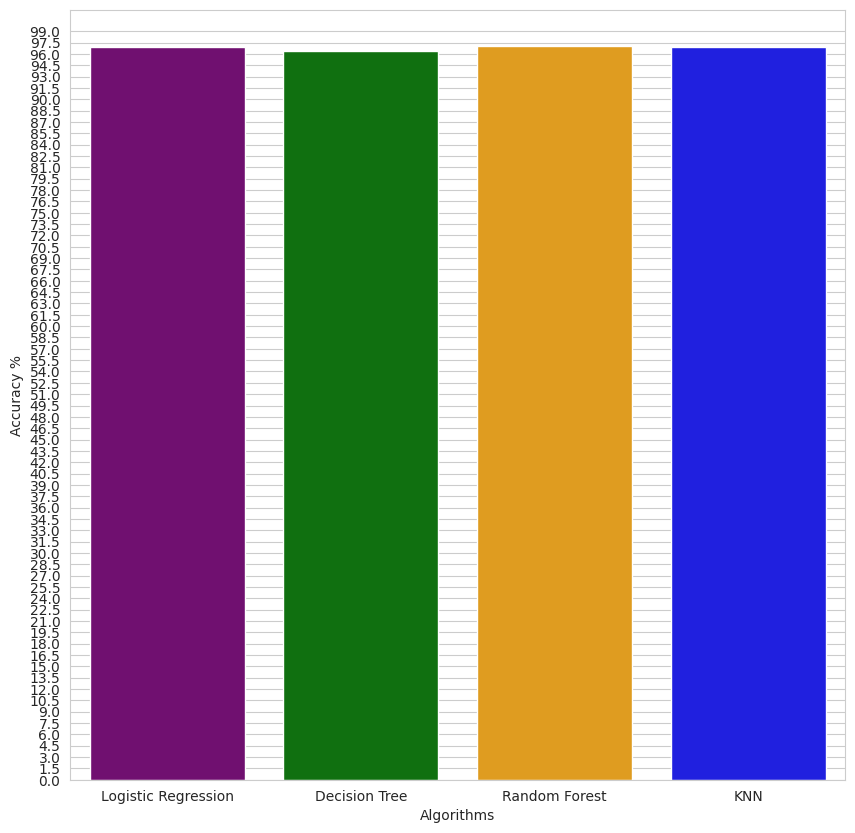

In [14]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
plt.yticks(np.arange(0,100,1.5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")

# x axis parsing keys and values from dictionaries
# keys = name of algo
# values = accuracy of algo
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [15]:
# Predicted values
y_head_lr = lr.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)
y_head_knn = knn.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
# y_head_lr = new predicted value
# y_test = the original one
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_knn = confusion_matrix(y_test,y_head_knn)

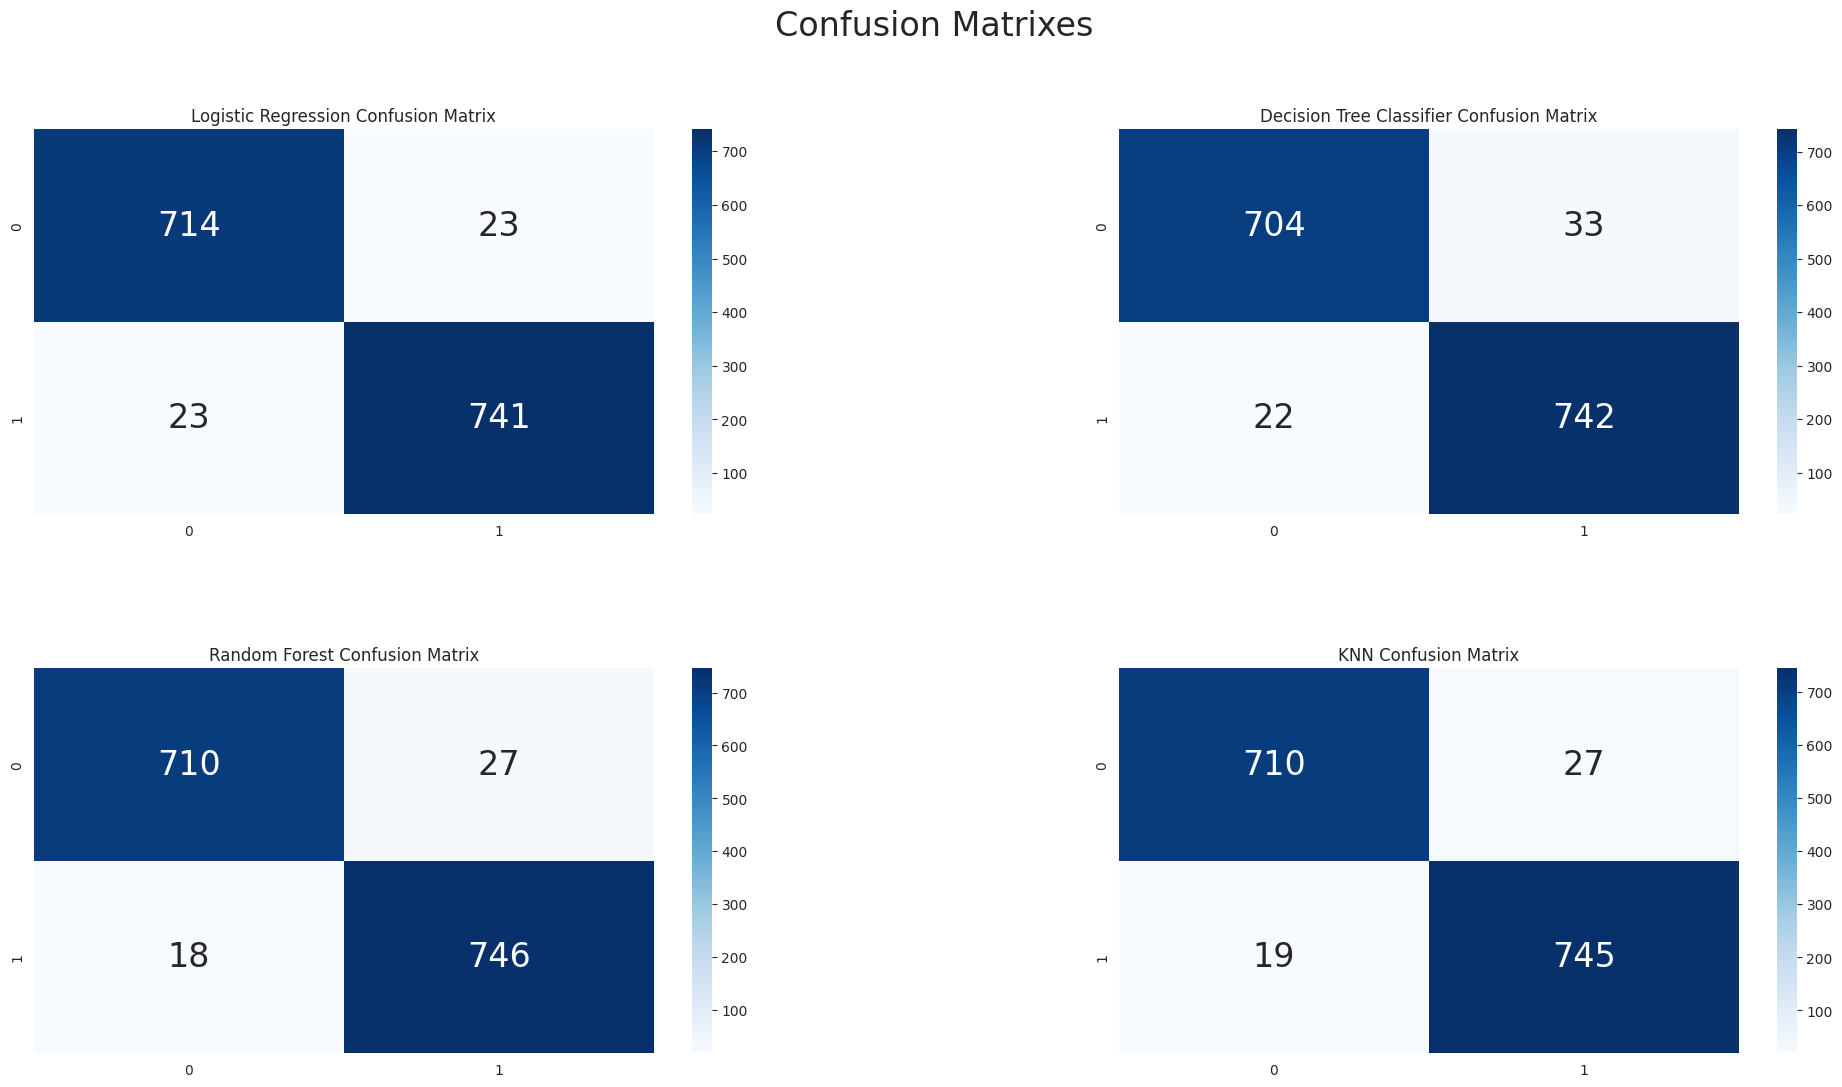

In [17]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 24})

plt.subplot(2,2,4)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 24})

plt.show()

Logistic: ROC AUC=0.995


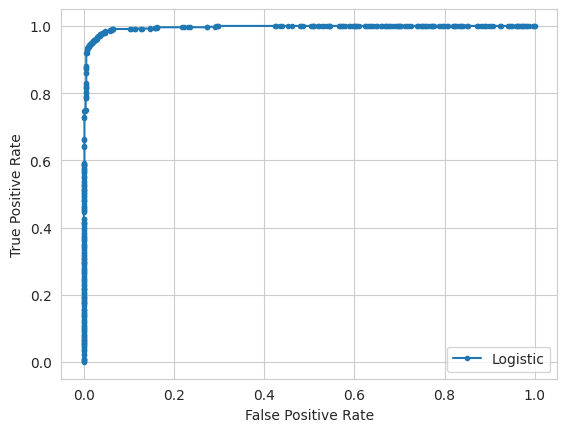

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# roc = receiver operating characteristics curve
# if roc threshold is > 0.7, the model is suitable to predict for our dataset

# predict probabilities
lr_probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))


# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: ROC AUC=0.964


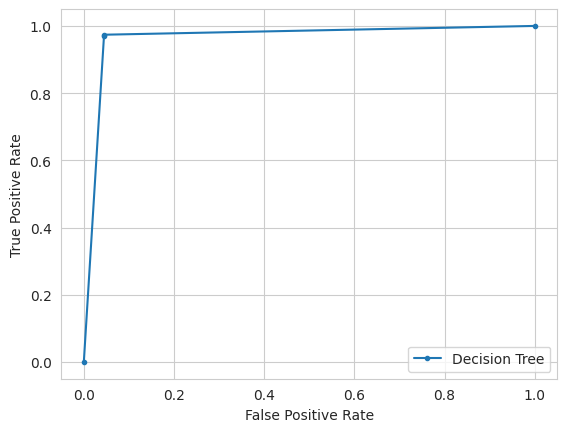

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# roc = receiver operating characteristics curve
# if roc threshold is > 0.7, the model is suitable to predict for our dataset

# predict probabilities
dtc_probs = dtc.predict_proba(x_test)
# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]
# calculate scores
dtc_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (dtc_auc))


# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: ROC AUC=0.990


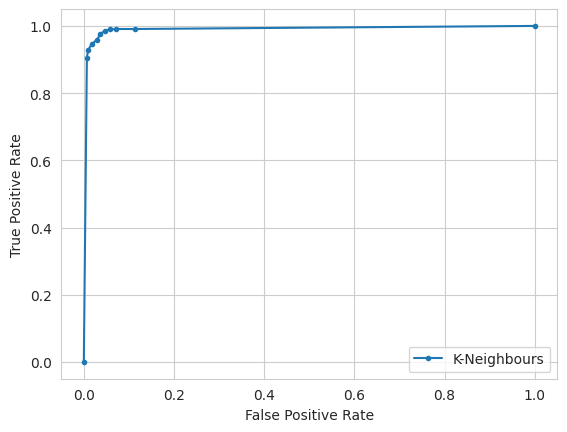

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# roc = receiver operating characteristics curve
# if roc threshold is > 0.7, the model is suitable to predict for our dataset

# predict probabilities
knn_probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
# calculate scores
knn_auc = roc_auc_score(y_test, knn_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (knn_auc))


# calculate roc curves
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
# plot the roc curve for the model
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='K-Neighbours')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

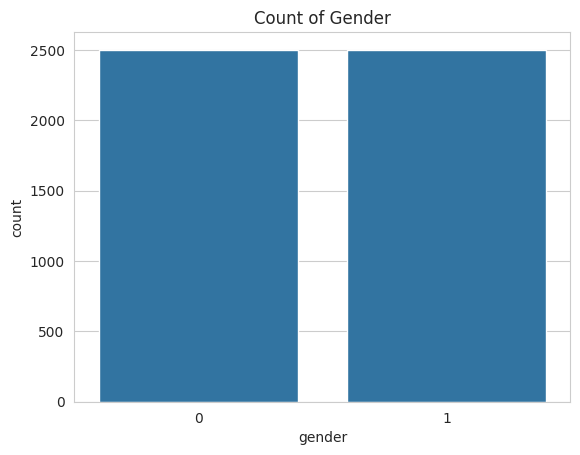

In [21]:
import seaborn as sns
sns.countplot(data=df_gender, x='gender')
plt.title('Count of Gender')
plt.show()

In [22]:
print(df_gender.groupby('gender').size())

gender
0    2500
1    2501
dtype: int64


In [23]:
features = list(df_gender.columns)
column_to_exclude = 'gender'
features = [col for col in features if col != column_to_exclude]

print(features)

['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']


In [24]:
X = df_gender[features] #input
y = df_gender['gender'] #target

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.965


In [26]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.975
Accuracy on test set: 0.970


In [27]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.         0.02700415 0.02425951 0.6271414  0.14550954 0.07740101
 0.09868439]


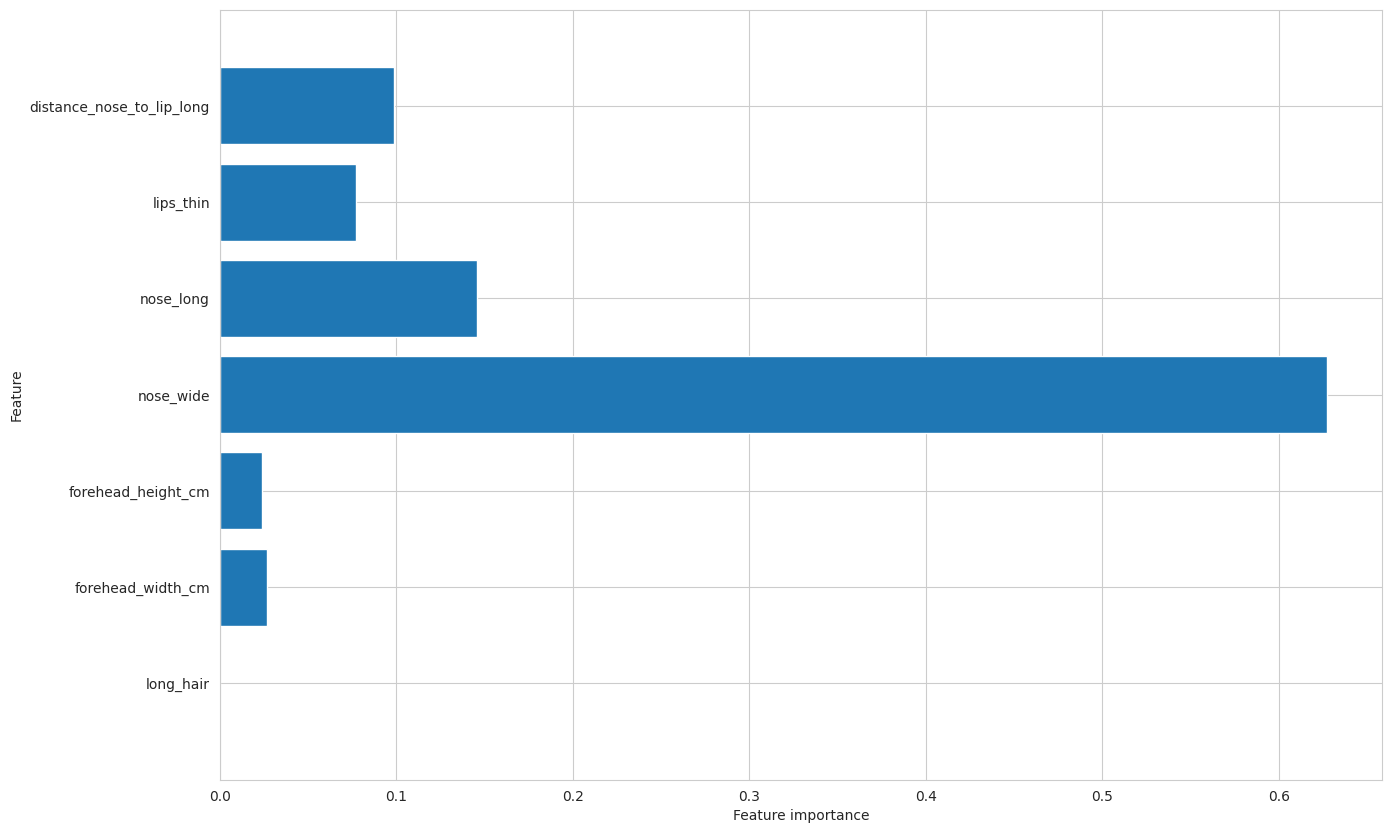

In [28]:
# feature importance falls under diagnostic analytics
# decision tree falls under predictive analytics
def plot_feature_importances_creditcard(model):
    plt.figure(figsize=(15,10)) # width and height
    n_features = 7  #total number of input features
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features) # y-axis labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_creditcard(tree)

In [29]:
important_features = list(df_gender.columns)
columns_to_exclude = ['gender','long_hair']
important_features = [col for col in features if col not in columns_to_exclude]

print(important_features)

['forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']


In [30]:
f = df_gender[important_features] #input
t = df_gender['gender'] #target

print(f)
print(t)

      forehead_width_cm  forehead_height_cm  nose_wide  nose_long  lips_thin  \
0                  11.8                 6.1          1          0          1   
1                  14.0                 5.4          0          0          1   
2                  11.8                 6.3          1          1          1   
3                  14.4                 6.1          0          1          1   
4                  13.5                 5.9          0          0          0   
...                 ...                 ...        ...        ...        ...   
4996               13.6                 5.1          0          0          0   
4997               11.9                 5.4          0          0          0   
4998               12.9                 5.7          0          0          0   
4999               13.2                 6.2          0          0          0   
5000               15.4                 5.4          1          1          1   

      distance_nose_to_lip_long  
0    

In [31]:
# Create and fit the decision tree
# criterion
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(f, t)

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf_dt,
                                feature_names=important_features,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('gender decTree.png')


True

In [32]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz

tree_rules = export_text(clf_dt, feature_names=important_features)
print(tree_rules)

|--- nose_wide <= 0.50
|   |--- lips_thin <= 0.50
|   |   |--- forehead_width_cm <= 14.40
|   |   |   |--- class: 1
|   |   |--- forehead_width_cm >  14.40
|   |   |   |--- class: 0
|   |--- lips_thin >  0.50
|   |   |--- distance_nose_to_lip_long <= 0.50
|   |   |   |--- class: 1
|   |   |--- distance_nose_to_lip_long >  0.50
|   |   |   |--- class: 0
|--- nose_wide >  0.50
|   |--- nose_long <= 0.50
|   |   |--- distance_nose_to_lip_long <= 0.50
|   |   |   |--- class: 1
|   |   |--- distance_nose_to_lip_long >  0.50
|   |   |   |--- class: 0
|   |--- nose_long >  0.50
|   |   |--- distance_nose_to_lip_long <= 0.50
|   |   |   |--- class: 0
|   |   |--- distance_nose_to_lip_long >  0.50
|   |   |   |--- class: 0

